# Assignment 1 - Binary Classification Evaluation Metrics

**Objective:**
The objective of this assignment is to assess your understanding of fundamental concepts in model evaluation for machine learning tasks. This assignment covers topics discussed in the first half of the course, including key evaluation metrics, confusion matrices, ROC curves, and Precision-Recall curves.
Instructions:

1. Theory Questions:
Answer the following theoretical questions:

    1. Explain the limitations of accuracy as an evaluation metric in imbalanced datasets. How does accuracy behave when classes are heavily skewed, and why might it provide misleading results?
    2. Describe the purpose and interpretation of a confusion matrix. How does it help in assessing a classification model's performance?
    3. Explain the concept of ROC curves. What does each point on an ROC curve represent? How is the area under the ROC curve (AUC-ROC) calculated?
    4. Compare and contrast the advantages and disadvantages of ROC curves and Precision-Recall curves. In what scenarios would you prefer to use one over the other, and why?

2. Practical Exercises:
* Implement Python code to calculate the following evaluation metrics for a given binary classification problem: Log Loss
* Select the best metric for an applied scenario

**Submission Guidelines:**
* Submit your responses to the theory questions in a neatly organized markdown.
* Include your Python code for the practical exercise.
* Submit your assignment as a single `.ipynb` file named `MY NAME Assignment 1 - Log Loss` via the course submission platform (slack).

## Part 1: Theory Questions (20 points)
Provide your answers here:

    1. Accuracy as an evaluation metric in imbalanced datasets can make a model appear as if it performing better than it really is for the given task. For example, if building a model to detect fraud (noted as the positive class), and fraud is a rare occurence (1 out of every 100), if the model were to always predict the negative class the accuracy would still show as .99 even though it is doing a poor job at the task given.
    2. A confusion matrix is a 2x2 table that lists True Positives, True Negatives, False Positives, and False Negatives. Confusion matrices can help visually identify where a binary classification model is missing the mark, and can also help with quick calculation of key metrics such as Precision and Recall.
    3. A ROC is a representation of performance of a classification model across thresholds. It plots the True Positive Rate against the False Positive rate. Eeach poin ton a ROC curve representes the True Positive rate and False Positive rate across every threshold value. ROC-AUC is calculated by summing the total area under the plotted curve. 1 represents a perfect classifier and 0.5 represents a completely random classifier.
    4. ROC is vest used when working with balanced datasets, where PR curves are best used when dealing with imbalanced datasets. PR curves would be better used in a scenario such as medical diagnosis where identifying positive instances is important.

## Practicing Log Loss (25 Points)

**Objective:**
The objective of this assignment is to deepen your understanding of log loss, also known as logarithmic loss or cross-entropy loss, and its application in evaluating the performance of classification models.

**Instructions:**
In this assignment, you will be given a set of binary classification predictions along with their corresponding actual class labels. Your task is to calculate the log loss for each prediction and then analyze the overall log loss performance of the model.

**Dataset:**
You are provided with a dataset containing the following information:

Predicted probabilities for the positive class (ranging from 0 to 1) for a set of instances.
Actual binary class labels (0 or 1) indicating whether the instance belongs to the positive class or not.

**Assignment Tasks:**
1. Calculate the log loss for each instance in the dataset using the predicted probabilities and actual class labels.
2. Summarize the individual log losses and compute the overall log loss performance for the model.
3. Interpret the overall log loss value and analyze the model's performance. Discuss any insights or observations derived from the log loss analysis.


**Dataset:**

| Instance | Predicted Probability | Actual Label |
|----------|------------------------|--------------|
|    1     |          0.9           |       1      |
|    2     |          0.3           |       0      |
|    3     |          0.6           |       1      |
|    4     |          0.8           |       0      |
|    5     |          0.1           |       1      |


**Grading Criteria:**

* Correctness of log loss calculations.
* Clarity and completeness of the analysis.
* Insights derived from the log loss interpretation.
* Overall presentation and adherence to submission guidelines.

In [1]:
import pandas as pd

# Create a DataFrame with the dataset
data = {
    'Instance': [1, 2, 3, 4, 5],
    'Predicted Probability': [0.9, 0.3, 0.6, 0.8, 0.1],
    'Actual Label': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   Instance  Predicted Probability  Actual Label
0         1                    0.9             1
1         2                    0.3             0
2         3                    0.6             1
3         4                    0.8             0
4         5                    0.1             1


In [6]:
import numpy as np

# 1) Calculate the log loss for each instance in the dataset using the predicted probabilities and actual class labels.
def log_loss(y_true, y_pred):
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

df['Log Loss'] = log_loss(df['Actual Label'], df['Predicted Probability'])

print(df)

# 2) Summarize the individual log losses and compute the overall log loss performance for the model.
print(f"Summarized Log Loss: {np.average(df['Log Loss']): .2f}")


   Instance  Predicted Probability  Actual Label  Log Loss
0         1                    0.9             1  0.105361
1         2                    0.3             0  0.356675
2         3                    0.6             1  0.510826
3         4                    0.8             0  1.609438
4         5                    0.1             1  2.302585
Summarized Log Loss:  0.98


*Question: Interpret the log loss above. How would it change if the predicted probability for instance 0 changed from 0.9 to 0.6? Why?*

*Your answer:* With Log Loss ranging from 0 to infiity, the Log Loss of 0.98 means that the model is doing a reasonable good job at prediction, although it could improve still. Changing instance 0 from 0.9 to 0.6 would increase the log loss meaning model performance would be worse. Since our Actual Label is 1 and we are predicted probability is moving way from 1 we know that our Log Loss will increase.

*Question: Why might you select log loss over precision, recall, or accuracy (in the context of any problem, not this one specifically)?*

*Your answer:* Overall log loss compared to other evaluation metrics helps us get some measure of the confidence in our predictions. Meaning that when we have a higher log loss value that our model was more confidently incorrect. This also means that log loss doesn't take into consideration a threshold value when doing evaluation.

## Application Scenario: Select a Metric (55 points)

**Application Scenario: Fraud Detection System**

You are working as a data scientist for a financial institution that wants to develop a fraud detection system to identify potentially fraudulent transactions. The dataset contains information about various transactions, including transaction amount, merchant ID, and transaction type. Your task is to build a machine learning model to classify transactions as either fraudulent or non-fraudulent.

**Problem Description:**

* Dataset: The dataset consists of historical transaction data, with labels indicating whether each transaction was fraudulent or not.
* Class Distribution: The dataset is mostly non-fraudulant cases, with a small percentage of transactions being fraudulent compared to legitimate transactions.
* Objective: The objective is to develop a fraud detection model that minimizes false negatives (fraudulent transactions incorrectly classified as non-fraudulent) while maintaining a reasonable level of precision.

**Stakeholder Requirements:**
Given the nature of the problem, it is crucial to prioritize recall (sensitivity) to ensure that as many fraudulent transactions as possible are detected. However, precision is also important to minimize false positives and avoid unnecessary investigations of legitimate transactions. Minimizing false negatives (missing fraudulent transactions) is of utmost importance.

**Task:**
Your task is to develop Python code to evaluate the performance of different machine learning models using various evaluation metrics, including accuracy, precision, recall, and F2 score. *Select the evaluation metric that best suits the problem and explain your choice*.

**Additional Guidelines:**
* You should preprocess the dataset as needed and split it into training and testing sets.
* Implement machine learning models of your choice (e.g., logistic regression, random forest) and evaluate their performance.
* Use appropriate evaluation metrics for binary classification tasks.
* Discuss the rationale behind your choice of evaluation metric and how it aligns with the problem requirements.
* Present your findings and recommendations for selecting the best model based on the chosen evaluation metric.

**Dataset Sample:**

| Transaction ID | Transaction Amount | Merchant ID | Transaction Type | Fraudulent |
|----------------|--------------------|-------------|------------------|------------|
| 1              | 1000               | M123        | Online Purchase  | 0          |
| 2              | 500                | M456        | ATM Withdrawal   | 0          |
| 3              | 2000               | M789        | Online Purchase  | 1          |
| 4              | 1500               | M123        | POS Transaction  | 0          |
| 5              | 800                | M456        | Online Purchase  | 0          |
| 6              | 3000               | M789        | ATM Withdrawal   | 1          |

* Transaction ID: Unique identifier for each transaction.
* Transaction Amount: The amount of money involved in the transaction.
* Merchant ID: Identifier for the merchant involved in the transaction.
* Transaction Type: The type of transaction (e.g., online purchase, ATM withdrawal, POS transaction).
* Fraudulent: Binary indicator (0 or 1) specifying whether the transaction is fraudulent (1) or not (0).

In [7]:
import pandas as pd

# Creating the dataset
data = {
    'Transaction ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                       21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                       31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    'Transaction Amount': [1000, 500, 2000, 1500, 800, 3000, 1200, 700, 1800, 1300,
                           900, 400, 2200, 1600, 850, 2800, 1100, 600, 1900, 1400,
                           950, 300, 2100, 1700, 820, 3200, 1250, 720, 1850, 1350,
                           880, 420, 2400, 1750, 830, 3100, 1150, 620, 1950, 1450],
    'Merchant ID': ['M123', 'M456', 'M789', 'M123', 'M456', 'M789', 'M123', 'M456', 'M789', 'M123',
                    'M456', 'M789', 'M123', 'M456', 'M789', 'M123', 'M456', 'M789', 'M123', 'M456',
                    'M123', 'M456', 'M789', 'M123', 'M456', 'M789', 'M123', 'M456', 'M789', 'M123',
                    'M456', 'M789', 'M123', 'M456', 'M789', 'M123', 'M456', 'M789', 'M123', 'M456'],
    'Transaction Type': ['Online Purchase', 'ATM Withdrawal', 'Online Purchase', 'POS Transaction', 'Online Purchase',
                         'ATM Withdrawal', 'Online Purchase', 'ATM Withdrawal', 'Online Purchase', 'POS Transaction',
                         'Online Purchase', 'ATM Withdrawal', 'Online Purchase', 'ATM Withdrawal', 'Online Purchase',
                         'POS Transaction', 'Online Purchase', 'ATM Withdrawal', 'Online Purchase', 'ATM Withdrawal',
                         'Online Purchase', 'ATM Withdrawal', 'Online Purchase', 'POS Transaction', 'Online Purchase',
                         'ATM Withdrawal', 'Online Purchase', 'ATM Withdrawal', 'Online Purchase', 'POS Transaction',
                         'Online Purchase', 'ATM Withdrawal', 'Online Purchase', 'ATM Withdrawal', 'Online Purchase',
                         'POS Transaction', 'Online Purchase', 'ATM Withdrawal', 'Online Purchase', 'ATM Withdrawal'],
    'Fraudulent': [0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
                   0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
                   1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
                   0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)


    Transaction ID  Transaction Amount Merchant ID Transaction Type  \
0                1                1000        M123  Online Purchase   
1                2                 500        M456   ATM Withdrawal   
2                3                2000        M789  Online Purchase   
3                4                1500        M123  POS Transaction   
4                5                 800        M456  Online Purchase   
5                6                3000        M789   ATM Withdrawal   
6                7                1200        M123  Online Purchase   
7                8                 700        M456   ATM Withdrawal   
8                9                1800        M789  Online Purchase   
9               10                1300        M123  POS Transaction   
10              11                 900        M456  Online Purchase   
11              12                 400        M789   ATM Withdrawal   
12              13                2200        M123  Online Purchase   
13    

## Split into Train/Validate/Test and use Pipeline and ColumnTranformer to Preprocess Data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split into X and Y
X = df.iloc[:, [1, 2, 3]]
y = df.iloc[:, 4]

# Train-Test Split
## Split into Training and Test/Validation Set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

## Split Test/Validation into Test and Validation Sets
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build Preprocessing Pipeline
numeric_list = ['Transaction Amount']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', MinMaxScaler())
])

category_list = ['Merchant ID', 'Transaction Type']

for col in category_list:
    X_train[col] = X_train[col].astype('category')
    X_validate[col] = X_validate[col].astype('category')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="MISSING")),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_list),
        ('cat', categorical_transformer, category_list)
    ],
    remainder='passthrough'
)

processed_train = preprocessor.fit_transform(X_train)
processed_validate = preprocessor.transform(X_validate)
processed_test = preprocessor.transform(X_test)

## Use Grid Search to find best Hyperparameters for the chosen models

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score

rfc = RandomForestClassifier(random_state=42)
rfc_params = {
    'n_estimators': [10, 100, 500],
    'min_samples_split': [2, 5, 20],
    'max_depth': [None, 5, 20]
}

lr = LogisticRegression(random_state=42)
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

models = {
    'Random Forest': (rfc, rfc_params),
    'Logistic Regression': (lr, lr_params)
}

## Use Make Scorer to create an F2 Score - I chose F2 as it more heavily weights recall which is what we care about the most, but we also do still consider precision.
f2_scorer = make_scorer(fbeta_score, beta=2)

# Apply GridSearch to Random Forest and Print Results
grid_search_rf = GridSearchCV(rfc, rfc_params, cv=5, scoring=f2_scorer)
grid_search_rf.fit(processed_train, y_train)

best_score_rf = grid_search_rf.best_score_
best_model_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

validate_score_rf = best_model_rf.score(processed_validate, y_validate)

print(f"Model: Random Forest")
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross Validation Score: {best_score_rf}")
print(f"Validate Score with Best Model: {validate_score_rf}")

# Apply GridSearch to Logistic Regression and Print Results
grid_search_lr = GridSearchCV(lr, lr_params, cv=5, scoring=f2_scorer)
grid_search_lr.fit(processed_train, y_train)

best_score_lr = grid_search_lr.best_score_
best_model_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_

validate_score_lr = best_model_lr.score(processed_validate, y_validate)

print(f"Model: Logistic Regression")
print(f"Best Parameters: {best_params_lr}")
print(f"Best Cross Validation Score: {best_score_lr}")
print(f"Validate Score with Best Model: {validate_score_lr}")


Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}
Best Cross Validation Score: 0.5871794871794871
Validate Score with Best Model: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Model: Logistic Regression
Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross Validation Score: 0.4479638009049774
Validate Score with Best Model: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Use Random Forest on Test Set
Both models had the same validate score based on F2, but the Random Forest had a higher Cross Validation Score so that's the model that I've chosen to use against test. Overall both model's performance was very low.

If this were a real-life example, I'd probably stop at this point and look to other models, or adjusting hyperparameters further. Overall there are only four items to predict against within the validation set, so this low number of observations can highly skew our results.

In [16]:
test_score = best_model_rf.score(processed_test, y_test)
print(f"Score of Random Forest on Test Set: {test_score}")

Score of Random Forest on Test Set: 0.75


## Create Confusion Matrix to Display Results on Test Set

    Actual  Predicted
16       0          0
12       0          1
19       0          0
27       0          0

Rearranged Confusion Matrix:
 [[0 0]
 [1 3]]


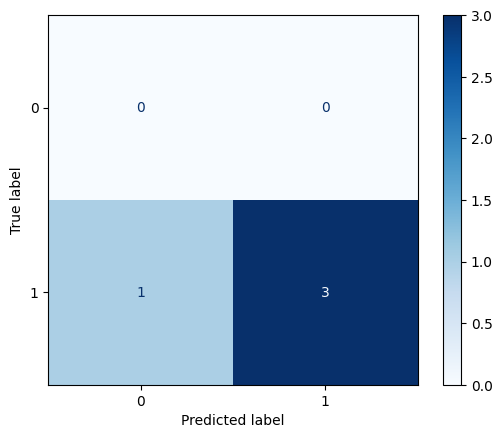

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model_rf.predict(processed_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
print("")

cm = confusion_matrix(y_test, y_pred)
# Swapping rows and columns to get True Positives in the top-left
cm_rearranged = np.array([[cm[1, 1], cm[1, 0]],
                          [cm[0, 1], cm[0, 0]]])

print("Rearranged Confusion Matrix:\n", cm_rearranged)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rearranged)
disp.plot(cmap='Blues')